In [1]:
import os
os.chdir("/home/jovyan/NAS/Progetti/7.Brain-Classification/BrainNoBrain")

In [2]:
from LightningModule.DataModule import BrainClassificationDataModule
from LightningModule.ModelModule import BrainClassificationModelModule
import torch
from torch.nn import CrossEntropyLoss
import numpy as np
from lightning.pytorch.loggers import TensorBoardLogger,NeptuneLogger
from sklearn.utils.class_weight import compute_class_weight
import lightning as L
import neptune

In [3]:
data = BrainClassificationDataModule(data_dir="/mnt/NAS_25/OnWay/BrainNoBrain/")

Loading dataset: 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]


torch.Size([1, 1, 256, 256]) tensor([1])


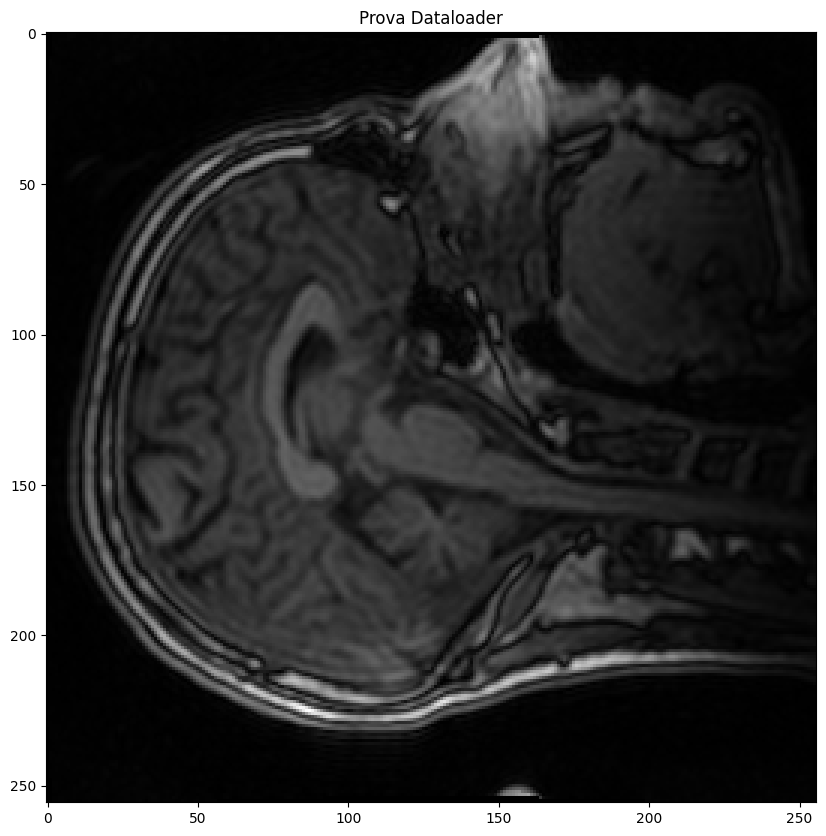

In [4]:
data.check_dataloader()

In [5]:
y_train = data.get_label()
class_weight = torch.tensor(compute_class_weight("balanced",classes = np.unique(y_train),y=y_train )).type(torch.float)

In [6]:
lr = 1e-5
loss_function = CrossEntropyLoss(weight=class_weight)

In [7]:
model = BrainClassificationModelModule(loss_function,lr)

In [8]:
model_version = neptune.init_model_version(
    model="BRAIN-D",
    project="marioverd/BrainNoBrain",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5MjRhMWVmZC0xMzhiLTQ4YzAtYjE4ZS0zNTlkOGJjOTkzNWEifQ==", # your credentials
)

https://app.neptune.ai/marioverd/BrainNoBrain/m/BRAIN-D/v/BRAIN-D-7


In [9]:
model_version["model"].upload("./LightningModule/ModelModule.py")

In [10]:

save_dir  = "./log/BrainNoBrain"
model_name = model.__class__.__name__
logger = TensorBoardLogger(save_dir = save_dir, name=model_name,flush_secs=10)
neptune_logger = NeptuneLogger(
    project="marioverd/BrainNoBrain",
    api_key="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5MjRhMWVmZC0xMzhiLTQ4YzAtYjE4ZS0zNTlkOGJjOTkzNWEifQ==",
    log_model_checkpoints=False,
)

In [11]:
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(monitor = "val_BinaryAUROC",verbose=True,mode= "max",save_weights_only=True,auto_insert_metric_name = True)
early_stop_callback = L.pytorch.callbacks.EarlyStopping(monitor="Validation Loss",patience=10, verbose=True, mode="min")


In [12]:
trainer = L.Trainer( logger = [logger,neptune_logger],
                    max_epochs = 100,
                    accelerator = "cuda",
                    deterministic=True ,
                    check_val_every_n_epoch = 1,
                    log_every_n_steps =26,
                    callbacks = [checkpoint_callback,early_stop_callback]
                    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [13]:
trainer.fit(model,data)

Missing logger folder: ./log/BrainNoBrain/BrainClassificationModelModule
/home/jovyan/my-conda-envs/CHAIMELEON/lib/python3.10/site-packages/lightning/pytorch/loggers/neptune.py:383: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


https://app.neptune.ai/marioverd/BrainNoBrain/e/BRAIN-11


Loading dataset: 100%|██████████| 411/411 [00:18<00:00, 22.44it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                                           | Type             | Params
------------------------------------------------------------------------------------
0 | _BrainClassificationModelModule__model         | DenseNet121      | 6.9 M 
1 | loss_function                                  | CrossEntropyLoss | 0     
2 | _BrainClassificationModelModule__train_metrics | MetricCollection | 0     
3 | _BrainClassificationModelModule__val_metrics   | MetricCollection | 0     
------------------------------------------------------------------------------------
6.9 M     Trainable params
0         Non-trainable params
6.9 M     Total params
27.799    Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)


You are trying to use a metric in deterministic mode on GPU that uses `torch.cumsum`, which is currently not supported. The tensor will be copied to the CPU memory to compute it and then copied back to GPU. Expect some slowdowns.


Epoch 0: 100%|██████████| 26/26 [00:25<00:00,  1.02it/s, v_num=N-11, Validation Loss=0.629, Training Loss=0.610]

Metric Validation Loss improved. New best score: 0.629
Epoch 0, global step 26: 'val_BinaryAUROC' reached 0.71909 (best 0.71909), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=0-step=26.ckpt' as top 1


Epoch 1: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.470, Training Loss=0.452]

Metric Validation Loss improved by 0.158 >= min_delta = 0.0. New best score: 0.470
Epoch 1, global step 52: 'val_BinaryAUROC' reached 0.94474 (best 0.94474), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=1-step=52.ckpt' as top 1


Epoch 2: 100%|██████████| 26/26 [00:29<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.350, Training Loss=0.347]

Metric Validation Loss improved by 0.120 >= min_delta = 0.0. New best score: 0.350
Epoch 2, global step 78: 'val_BinaryAUROC' reached 0.97024 (best 0.97024), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=2-step=78.ckpt' as top 1


Epoch 3: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.296, Training Loss=0.274]

Metric Validation Loss improved by 0.054 >= min_delta = 0.0. New best score: 0.296
Epoch 3, global step 104: 'val_BinaryAUROC' reached 0.97686 (best 0.97686), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=3-step=104.ckpt' as top 1


Epoch 4: 100%|██████████| 26/26 [00:29<00:00,  0.87it/s, v_num=N-11, Validation Loss=0.258, Training Loss=0.219]

Metric Validation Loss improved by 0.038 >= min_delta = 0.0. New best score: 0.258
Epoch 4, global step 130: 'val_BinaryAUROC' reached 0.98109 (best 0.98109), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=4-step=130.ckpt' as top 1


Epoch 5: 100%|██████████| 26/26 [00:35<00:00,  0.73it/s, v_num=N-11, Validation Loss=0.219, Training Loss=0.175]

Metric Validation Loss improved by 0.039 >= min_delta = 0.0. New best score: 0.219
Epoch 5, global step 156: 'val_BinaryAUROC' reached 0.98681 (best 0.98681), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=5-step=156.ckpt' as top 1


Epoch 6: 100%|██████████| 26/26 [00:30<00:00,  0.85it/s, v_num=N-11, Validation Loss=0.195, Training Loss=0.145]

Metric Validation Loss improved by 0.024 >= min_delta = 0.0. New best score: 0.195
Epoch 6, global step 182: 'val_BinaryAUROC' reached 0.98900 (best 0.98900), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=6-step=182.ckpt' as top 1


Epoch 7: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.180, Training Loss=0.119]

Metric Validation Loss improved by 0.015 >= min_delta = 0.0. New best score: 0.180
Epoch 7, global step 208: 'val_BinaryAUROC' reached 0.98989 (best 0.98989), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=7-step=208.ckpt' as top 1


Epoch 8: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.158, Training Loss=0.0969]

Metric Validation Loss improved by 0.022 >= min_delta = 0.0. New best score: 0.158
Epoch 8, global step 234: 'val_BinaryAUROC' reached 0.99216 (best 0.99216), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=8-step=234.ckpt' as top 1


Epoch 9: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.146, Training Loss=0.0848]

Metric Validation Loss improved by 0.012 >= min_delta = 0.0. New best score: 0.146
Epoch 9, global step 260: 'val_BinaryAUROC' reached 0.99290 (best 0.99290), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=9-step=260.ckpt' as top 1


Epoch 10: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.139, Training Loss=0.0731]

Metric Validation Loss improved by 0.007 >= min_delta = 0.0. New best score: 0.139
Epoch 10, global step 286: 'val_BinaryAUROC' reached 0.99294 (best 0.99294), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=10-step=286.ckpt' as top 1


Epoch 11: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.128, Training Loss=0.0618]

Metric Validation Loss improved by 0.011 >= min_delta = 0.0. New best score: 0.128
Epoch 11, global step 312: 'val_BinaryAUROC' reached 0.99390 (best 0.99390), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=11-step=312.ckpt' as top 1


Epoch 12: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.118, Training Loss=0.0553]

Metric Validation Loss improved by 0.011 >= min_delta = 0.0. New best score: 0.118
Epoch 12, global step 338: 'val_BinaryAUROC' reached 0.99497 (best 0.99497), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=12-step=338.ckpt' as top 1


Epoch 13: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.113, Training Loss=0.0452]

Metric Validation Loss improved by 0.005 >= min_delta = 0.0. New best score: 0.113
Epoch 13, global step 364: 'val_BinaryAUROC' reached 0.99521 (best 0.99521), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=13-step=364.ckpt' as top 1


Epoch 14: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.110, Training Loss=0.0403]

Metric Validation Loss improved by 0.002 >= min_delta = 0.0. New best score: 0.110
Epoch 14, global step 390: 'val_BinaryAUROC' was not in top 1


Epoch 15: 100%|██████████| 26/26 [00:28<00:00,  0.91it/s, v_num=N-11, Validation Loss=0.107, Training Loss=0.0321]

Metric Validation Loss improved by 0.003 >= min_delta = 0.0. New best score: 0.107
Epoch 15, global step 416: 'val_BinaryAUROC' was not in top 1


Epoch 16: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.102, Training Loss=0.0311]

Metric Validation Loss improved by 0.005 >= min_delta = 0.0. New best score: 0.102
Epoch 16, global step 442: 'val_BinaryAUROC' was not in top 1


Epoch 17: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0997, Training Loss=0.0242]

Metric Validation Loss improved by 0.002 >= min_delta = 0.0. New best score: 0.100
Epoch 17, global step 468: 'val_BinaryAUROC' was not in top 1


Epoch 18: 100%|██████████| 26/26 [00:28<00:00,  0.91it/s, v_num=N-11, Validation Loss=0.0963, Training Loss=0.0251]

Metric Validation Loss improved by 0.003 >= min_delta = 0.0. New best score: 0.096
Epoch 18, global step 494: 'val_BinaryAUROC' reached 0.99541 (best 0.99541), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=18-step=494.ckpt' as top 1


Epoch 19: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.100, Training Loss=0.0179] 

Epoch 19, global step 520: 'val_BinaryAUROC' was not in top 1


Epoch 20: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.0939, Training Loss=0.0175]

Metric Validation Loss improved by 0.002 >= min_delta = 0.0. New best score: 0.094
Epoch 20, global step 546: 'val_BinaryAUROC' was not in top 1


Epoch 21: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0967, Training Loss=0.0144]

Epoch 21, global step 572: 'val_BinaryAUROC' was not in top 1


Epoch 22: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0957, Training Loss=0.0171]

Epoch 22, global step 598: 'val_BinaryAUROC' was not in top 1


Epoch 23: 100%|██████████| 26/26 [00:29<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.0841, Training Loss=0.014] 

Metric Validation Loss improved by 0.010 >= min_delta = 0.0. New best score: 0.084
Epoch 23, global step 624: 'val_BinaryAUROC' reached 0.99588 (best 0.99588), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=23-step=624.ckpt' as top 1


Epoch 24: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0804, Training Loss=0.0121]

Metric Validation Loss improved by 0.004 >= min_delta = 0.0. New best score: 0.080
Epoch 24, global step 650: 'val_BinaryAUROC' reached 0.99609 (best 0.99609), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=24-step=650.ckpt' as top 1


Epoch 25: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.0809, Training Loss=0.0112]

Epoch 25, global step 676: 'val_BinaryAUROC' was not in top 1


Epoch 26: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.0769, Training Loss=0.00971]

Metric Validation Loss improved by 0.003 >= min_delta = 0.0. New best score: 0.077
Epoch 26, global step 702: 'val_BinaryAUROC' reached 0.99636 (best 0.99636), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=26-step=702.ckpt' as top 1


Epoch 27: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0809, Training Loss=0.00858]

Epoch 27, global step 728: 'val_BinaryAUROC' was not in top 1


Epoch 28: 100%|██████████| 26/26 [00:28<00:00,  0.92it/s, v_num=N-11, Validation Loss=0.078, Training Loss=0.00755] 

Epoch 28, global step 754: 'val_BinaryAUROC' was not in top 1


Epoch 29: 100%|██████████| 26/26 [00:29<00:00,  0.87it/s, v_num=N-11, Validation Loss=0.0824, Training Loss=0.00787]

Epoch 29, global step 780: 'val_BinaryAUROC' was not in top 1


Epoch 30: 100%|██████████| 26/26 [00:28<00:00,  0.91it/s, v_num=N-11, Validation Loss=0.0711, Training Loss=0.0101] 

Metric Validation Loss improved by 0.006 >= min_delta = 0.0. New best score: 0.071
Epoch 30, global step 806: 'val_BinaryAUROC' reached 0.99665 (best 0.99665), saving model to './log/BrainNoBrain/BrainClassificationModelModule/version_0/checkpoints/epoch=30-step=806.ckpt' as top 1


Epoch 31: 100%|██████████| 26/26 [00:28<00:00,  0.90it/s, v_num=N-11, Validation Loss=0.0735, Training Loss=0.00723]

Epoch 31, global step 832: 'val_BinaryAUROC' was not in top 1


Epoch 32: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.0813, Training Loss=0.00632]

Epoch 32, global step 858: 'val_BinaryAUROC' was not in top 1


Epoch 33: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0793, Training Loss=0.00549]

Epoch 33, global step 884: 'val_BinaryAUROC' was not in top 1


Epoch 34: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.080, Training Loss=0.00486] 

Epoch 34, global step 910: 'val_BinaryAUROC' was not in top 1


Epoch 35: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0812, Training Loss=0.00524]

Epoch 35, global step 936: 'val_BinaryAUROC' was not in top 1


Epoch 36: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.0731, Training Loss=0.00438]

Epoch 36, global step 962: 'val_BinaryAUROC' was not in top 1


Epoch 37: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0775, Training Loss=0.0042] 

Epoch 37, global step 988: 'val_BinaryAUROC' was not in top 1


Epoch 38: 100%|██████████| 26/26 [00:29<00:00,  0.88it/s, v_num=N-11, Validation Loss=0.0776, Training Loss=0.00402]

Epoch 38, global step 1014: 'val_BinaryAUROC' was not in top 1


Epoch 39: 100%|██████████| 26/26 [00:29<00:00,  0.87it/s, v_num=N-11, Validation Loss=0.0776, Training Loss=0.00375]

Epoch 39, global step 1040: 'val_BinaryAUROC' was not in top 1


Epoch 40: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.0788, Training Loss=0.00372]

Monitored metric Validation Loss did not improve in the last 10 records. Best score: 0.071. Signaling Trainer to stop.
Epoch 40, global step 1066: 'val_BinaryAUROC' was not in top 1


Epoch 40: 100%|██████████| 26/26 [00:29<00:00,  0.89it/s, v_num=N-11, Validation Loss=0.0788, Training Loss=0.00372]
